# SNSim Examples

### Example to show how generate 1 light curve for SNIa and SNCC 

In [1]:
import snsim
import numpy as np
import pandas as pd
import sncosmo
from snsim.constants import C_LIGHT_KMS

In [2]:
snsim.dust_utils.check_files_and_download()

In [8]:

from snsim import astrobj as sn_astrobj

#Set the cosmology (astropy.cosmology object)
cosmology = {"name": "planck18"}
cosmo = snsim.utils.set_cosmo(cosmology)

zcos = 0.1
coords = [0.0, 0.0]

# Params dic
sim_par = {
    "zcos": zcos,
    "zpcmb": 0.0,
    "como_dist": cosmo.comoving_distance(zcos).value,
    "vpec": 300,
    "t0": 0,  # simulated peak time of the event
    "ra": coords[0],
    "dec": coords[1],
    "coh_sct": 0.0,
    "x1": 1,
    "c": 0.1,
    "M0": -19.3,
    "alpha": 0.14,
    "beta": 3.1,
    "model_name": "salt2",
    "model_version": "2.4",
}

SNIa_Tripp = sn_astrobj.SNIa(sim_par, relation="SALTTripp")

obs = pd.DataFrame(
    {
        "time": [-10, 0, 20, 50],
        "band": ["bessellb", "bessellv", "bessellr", "besselli"],
        "zp": np.ones(4) * 30,
        "zpsys": ["ab"] * 4,
        "gain": np.ones(4),
        "skynoise": np.zeros(4),
        "sig_zp": np.zeros(4),
    }
)

In [10]:
lcs = SNIa_Tripp.gen_flux(obs, seed=1234, mod_fcov=False)

In [17]:
lcs['fluxerrtrue'].values

array([106.26563064, 144.63813479, 106.49653405,  60.44134768])

### Init Survey Obj from observation file 

In [7]:
# Set the survey
survey_config = {'survey_file': './survey_file_example.csv', #survey observation log
                 'sig_psf': 0.0,
                 'sig_zp': 0.0,
                 'gain': 1.,
                 'zp': 25.,
                 'ra_size': 7.295,
                 'dec_size': 7.465,
                 'noise_key': ['skynoise', 'skysigADU']}

#init survey OBJ
survey = snsim.survey_host.SurveyObs(survey_config)
print(survey)

SURVEY FILE : ./survey_file_example.csv

First day in survey_file : 58000.00 MJD / 2017-09-04 00:00:00.000
Last day in survey_file : 58100.00 MJD / 2017-12-13 00:00:00.000

Survey effective duration is 100.00 days

Survey envelope area is 57.74 squared degrees (0.1 % of the sky)

No cut on survey file.


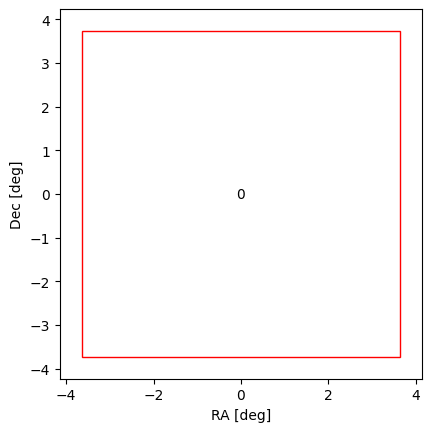

In [8]:
# Show the field map (Here one quadrant labeled 0)
survey.show_map()



## SNIa simulation

### Set the cosmology

In [9]:

# Set the cosmology (astropy.cosmology object)
cosmology = {'name': 'planck18'}
cosmo =  snsim.utils.set_cosmo(cosmology)

### Init SN parameters

In [10]:
# Set the SNIa parameters
zcos = 0.05
coords = np.radians([42, 42])

#parameters of SNIa object
sn_par = {'zcos': zcos,
          'zpcmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          't0': 58057,
          'ra': coords[0],
          'dec': coords[1],
          'coh_sct': 0.0,
          'x1':1, 
          'c':0.1,
          'M0': -19.3,
          'alpha': 0.14,
          'beta': 3.1,
          'model_name': 'salt2',
          'model_version': '2.0',
          'mw_ebv': snsim.dust_utils.compute_ebv(*coords)
         }

mw_dust = {'model': 'ccm89'}
effects = [snsim.dust_utils.init_mw_dust(mw_dust)]

#Init SNIa object
SNIa = snsim.astrobj.SNIa(sn_par, relation='SALTTripp', effects=effects)

In [15]:
#create a disctionary with parameter needed to define the observations of the SN
#evaluate Z-obs and time range where we can observed the event in the rest frame
#( [-20,50] phase respect to t_peak where Salt model is defined)
dict_obs_par={}
_1_zobs_ = (1 +sn_par['zcos']) * (1+sn_par['zpcmb'])*(1 + sn_par['vpec'] / C_LIGHT_KMS)    
dict_obs_par['min_t'] = sn_par['t0'] - 20 * _1_zobs_
dict_obs_par['max_t'] = sn_par['t0'] + 50 * _1_zobs_
dict_obs_par['1_zobs'] = _1_zobs_
dict_obs_par['t0']=sn_par['t0']
dict_obs_par['ra']=sn_par['ra']
dict_obs_par['dec']=sn_par['dec']

#convert it to a DataFrame
obs_par=pd.DataFrame(dict_obs_par,index=[0])
obs_par

,min_t,max_t,1_zobs,t0,ra,dec
0,58035.978985,58109.552536,1.051051,58057,0.733038,0.733038


### Define the observation and simulate the light curve

In [16]:
#define the observation of the object
epochs,param= survey.get_observations(obs_par,[-30,60])
epochs

,time,band,fieldID,skynoise,zp,sig_zp,sig_psf,gain,zpsys
ID,,,,,,,,,
0,58026.530612,ztfg,1,405.460001,25.0,0.0,0.0,1.0,ab
0,58028.571429,ztfg,1,582.286411,25.0,0.0,0.0,1.0,ab
0,58030.612245,ztfg,1,862.602785,25.0,0.0,0.0,1.0,ab
0,58032.653061,ztfr,1,167.057133,25.0,0.0,0.0,1.0,ab
0,58034.693878,ztfg,1,637.828536,25.0,0.0,0.0,1.0,ab
0,58036.734694,ztfg,1,347.366061,25.0,0.0,0.0,1.0,ab
0,58038.775510,ztfr,1,476.512540,25.0,0.0,0.0,1.0,ab
0,58040.816327,ztfr,1,822.295606,25.0,0.0,0.0,1.0,ab
0,58042.857143,ztfr,1,746.557497,25.0,0.0,0.0,1.0,ab


In [17]:
#simulate the LC
lc=SNIa.gen_flux(epochs,np.random.default_rng(1200))
lc

,time,fluxtrue,fluxerrtrue,flux,fluxerr,mag,magerr,zp,zpsys,gain,skynoise,band,fieldID,sig_zp,sig_psf
epochs,,,,,,,,,,,,,,,
0,58036.734694,-4.018437,347.371845,252.054386,347.728680,18.996264,1.497858,25.0,ab,1.0,347.366061,ztfg,1,0.0,0.0
1,58038.775510,27.883131,476.541797,-64.157463,476.579855,NaN,NaN,25.0,ab,1.0,476.512540,ztfr,1,0.0,0.0
2,58040.816327,39.756483,822.319780,-1503.028791,823.209021,NaN,NaN,25.0,ab,1.0,822.295606,ztfr,1,0.0,0.0
3,58042.857143,183.819014,746.680598,359.402499,746.798165,18.611047,2.256038,25.0,ab,1.0,746.557497,ztfr,1,0.0,0.0
4,58044.897959,260.134264,415.257824,-85.142695,415.047068,NaN,NaN,25.0,ab,1.0,414.944486,ztfr,1,0.0,0.0
5,58046.938776,362.888493,290.359226,283.420820,290.222350,18.868921,1.111792,25.0,ab,1.0,289.733657,ztfr,1,0.0,0.0
6,58048.979592,487.045899,597.561795,-103.682217,597.240935,NaN,NaN,25.0,ab,1.0,597.154128,ztfr,1,0.0,0.0
7,58051.020408,582.802160,848.637710,1253.979189,849.033061,17.254274,0.735121,25.0,ab,1.0,848.294265,ztfr,1,0.0,0.0
8,58053.061224,622.283345,994.816545,795.109885,994.903405,17.748932,1.358558,25.0,ab,1.0,994.503733,ztfr,1,0.0,0.0


In [18]:
#parameters of the object in Lc header
lc.attrs

{'mu': 36.81185565719685,
 'zobs': 0.05105072689987433,
 'zCMB': 0.05105072689987433,
 'zcos': 0.05,
 'zpcmb': 0.0,
 'como_dist': 218.93393187129323,
 'vpec': 300,
 't0': 58057,
 'ra': 0.7330382858376184,
 'dec': 0.7330382858376184,
 'coh_sct': 0.0,
 'x1': 1,
 'c': 0.1,
 'M0': -19.3,
 'alpha': 0.14,
 'beta': 3.1,
 'model_name': 'salt2',
 'model_version': '2.0',
 'mw_ebv': 0.07019869961888064,
 'ID': 0,
 'mb': 17.68185565719685,
 'x0': 0.00134231219856923}

### Plot the SN

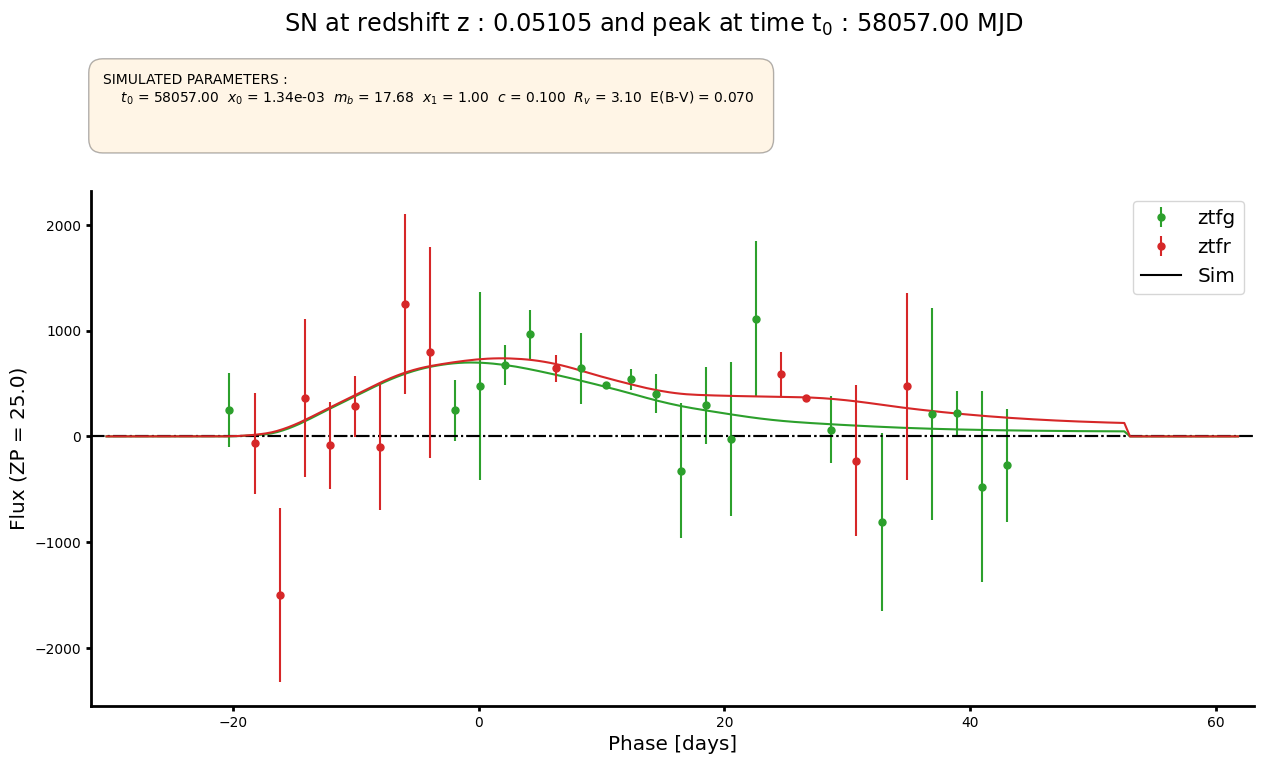

In [19]:
bandcol = {'ztfg': 'C2', 'ztfr': 'C3', 'ztfi': 'C5'}
snsim.plot_utils.plot_lc(lc,lc.attrs, snc_sim_model=SNIa.sim_model,
                        bandcol=bandcol,phase_limit=[-30,60])

### Add intrinsic scattering

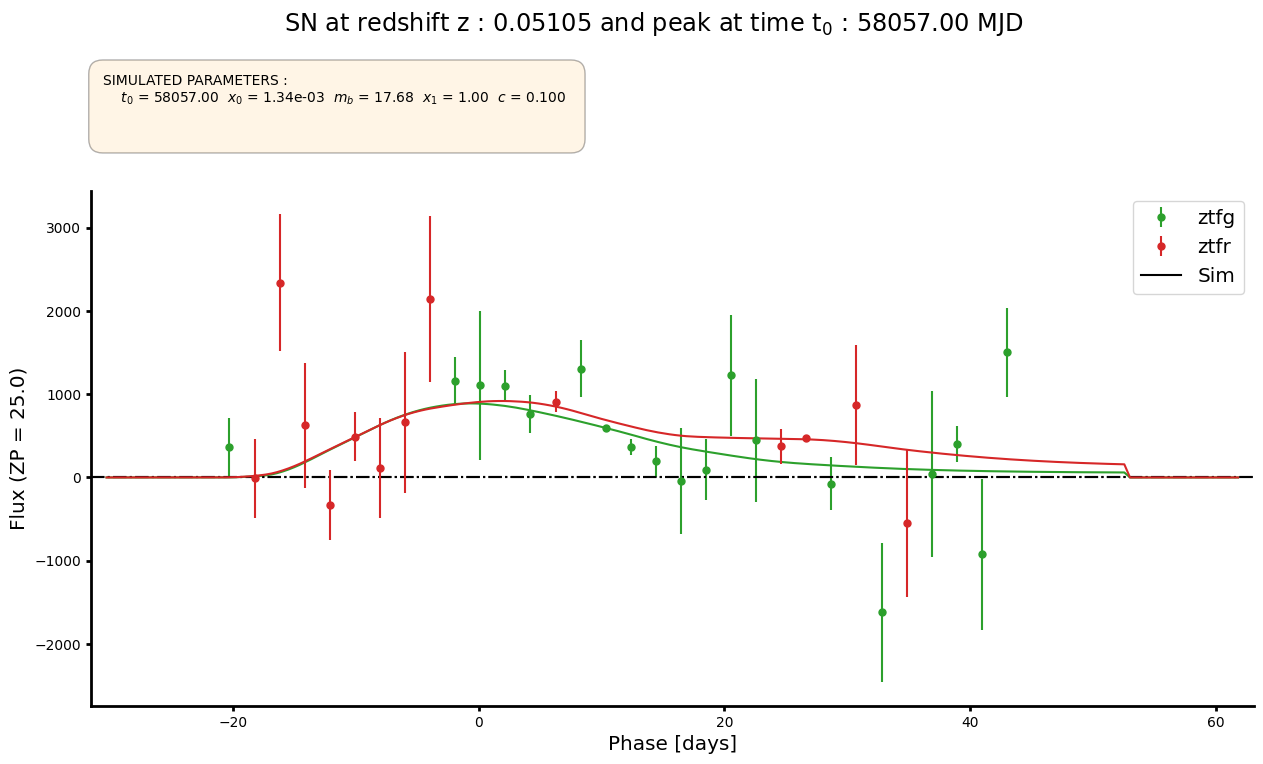

In [20]:
# Set the SNIa parameters
zcos = 0.05
coords = np.radians([42, 42])

# Set the sncosmo source for SNIa
sn_source = sncosmo.get_source(name='salt2', version='2.0')

effects = [snsim.scatter.init_sn_sct_model('G10', sn_source)]

#parameters of SNIa object
sn_par = {
          'zcos': zcos,
          'zpcmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 300,
          't0': 58057,
          'ra': coords[0],
          'dec': coords[1],
          'coh_sct': 0.0,
          'x1':1, 
          'c':0.1,
          'M0': -19.3,
          'alpha': 0.14,
          'beta': 3.1,
          'model_name': 'salt2',
          'model_version': '2.0'
         }




#Init SNIa object
SNIa = snsim.astrobj.SNIa(sn_par, effects=effects, relation='SALTTripp')

lc=SNIa.gen_flux(epochs,np.random.default_rng(1200))

bandcol = {'ztfg': 'C2', 'ztfr': 'C3', 'ztfi': 'C5'}
snsim.plot_utils.plot_lc(lc, lc.attrs, snc_sim_model=SNIa.sim_model,
                        bandcol=bandcol,phase_limit=[-30,60])

# Now we simulate 1 SN Core-Collapse

#### we use same observation file and cosmology as before

### We simulate a SNIc, but the method is the same for all SNCC

In [13]:
# Set the SNIc parameters
zcos = 0.02
coords = np.radians([42, 42])

#parameters of SNIc object
sn_par = {'zcos': zcos,
          't0': 0.,
          'zpcmb': 0.0,
          'como_dist': cosmo.comoving_distance(zcos).value,
          'vpec': 500,
          't0': 58057, #simulated peak time of the event
          'ra': coords[0],
          'dec': coords[1],
          'coh_sct': 0.3,
          'M0': -18,
          'model_name': 'v19-2007gr' # Name of sncosmo built-in source
           }



#Init SNIc object
SNIc = snsim.astrobj.SNIc(sn_par)

In [14]:
#create a disctionary with parameter needed to define the observations of the SN
#evaluate Z-obs and time range where we can observed the event in the rest frame
#( [-20,50] phase respect to t_peak where Salt model is defined)
dict_obs_par={}
_1_zobs_ = 1 + SNIc.zobs    
dict_obs_par['min_t'] = SNIc.sim_model.mintime()
dict_obs_par['max_t'] = SNIc.sim_model.maxtime()
dict_obs_par['1_zobs'] = _1_zobs_
dict_obs_par['t0']=sn_par['t0']
dict_obs_par['ra']=sn_par['ra']
dict_obs_par['dec']=sn_par['dec']

#convert it to a DataFrame
obs_par=pd.DataFrame(dict_obs_par,index=[0])
obs_par

,min_t,max_t,1_zobs,t0,ra,dec
0,58039.958024,58243.000699,1.021701,58057,0.733038,0.733038


In [15]:
#define the observation of the object
epochs,param= survey.get_observations(obs_par,[-200,250])
epochs

,time,band,fieldID,skynoise,zp,sig_zp,sig_psf,gain,zpsys
ID,,,,,,,,,
0,58000.000000,ztfg,1,629.554693,25.0,0.0,0.0,1.0,ab
0,58002.040816,ztfg,1,794.918147,25.0,0.0,0.0,1.0,ab
0,58004.081633,ztfg,1,857.808033,25.0,0.0,0.0,1.0,ab
0,58006.122449,ztfg,1,736.170271,25.0,0.0,0.0,1.0,ab
0,58008.163265,ztfg,1,716.202148,25.0,0.0,0.0,1.0,ab
0,58010.204082,ztfg,1,558.747930,25.0,0.0,0.0,1.0,ab
0,58012.244898,ztfr,1,242.029050,25.0,0.0,0.0,1.0,ab
0,58014.285714,ztfr,1,107.626067,25.0,0.0,0.0,1.0,ab
0,58016.326531,ztfg,1,18.283325,25.0,0.0,0.0,1.0,ab


In [16]:
#simulate the LC
lc=SNIc.gen_flux(epochs)
lc

,time,fluxtrue,fluxerrtrue,flux,fluxerr,mag,magerr,zp,zpsys,gain,skynoise,band,fieldID,sig_zp,sig_psf
epochs,,,,,,,,,,,,,,,
0,58040.816327,54.736590,822.328888,-1076.782725,822.950087,NaN,NaN,25.0,ab,1.0,822.295606,ztfr,1,0.0,0.0
1,58042.857143,193.216446,746.686891,-900.222485,747.160170,NaN,NaN,25.0,ab,1.0,746.557497,ztfr,1,0.0,0.0
2,58044.897959,376.092745,415.397423,248.947843,415.244355,19.009729,1.811005,25.0,ab,1.0,414.944486,ztfr,1,0.0,0.0
3,58046.938776,640.871788,290.837521,1039.907490,291.522725,17.457513,0.304370,25.0,ab,1.0,289.733657,ztfr,1,0.0,0.0
4,58048.979592,875.793269,597.886984,1632.802568,598.519720,16.967666,0.397987,25.0,ab,1.0,597.154128,ztfr,1,0.0,0.0
5,58051.020408,1108.468092,848.947365,1555.879665,849.210833,17.020060,0.592603,25.0,ab,1.0,848.294265,ztfr,1,0.0,0.0
6,58053.061224,1289.690522,995.151931,47.546356,994.527637,20.807207,22.710356,25.0,ab,1.0,994.503733,ztfr,1,0.0,0.0
7,58055.102041,1236.065648,287.756207,1245.830070,287.773173,17.261353,0.250793,25.0,ab,1.0,285.600366,ztfg,1,0.0,0.0
8,58057.142857,1181.456270,892.703189,268.273464,892.191572,18.928556,3.610811,25.0,ab,1.0,892.041214,ztfg,1,0.0,0.0


In [17]:
lc.attrs

{'mu': 34.77763241667154,
 'zobs': 0.021701176885510653,
 'zCMB': 0.021701176885510653,
 'zcos': 0.02,
 't0': 58057,
 'zpcmb': 0.0,
 'como_dist': 88.20208831459321,
 'vpec': 500,
 'ra': 0.7330382858376184,
 'dec': 0.7330382858376184,
 'coh_sct': 0.3,
 'M0': -18,
 'model_name': 'v19-2007gr',
 'ID': 0,
 'model_version': '1.0',
 'mb': 17.258117429121988,
 'amplitude': 3.537229263043246e-14}

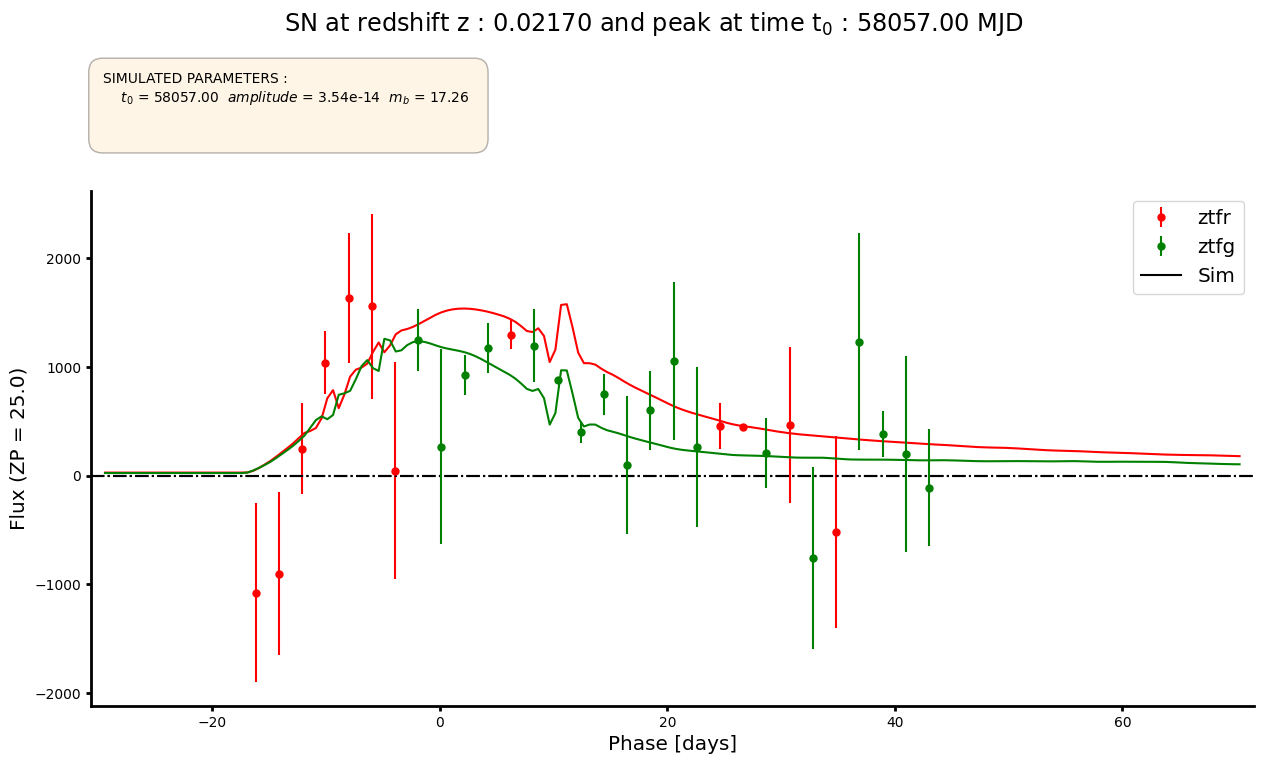

In [18]:
bandcol = {'ztfg': 'g', 'ztfr': 'r', 'ztfi': 'gold'}
snsim.plot_utils.plot_lc(lc,lc.attrs, snc_sim_model=SNIc.sim_model,
                        bandcol=bandcol,phase_limit=[-30,70])